# Project Title:Diabetes Prediction

# Prepared By:Swapan Kumar shee,B.Tech(C.S.E),3rd Year

# Institute:University of Engineering & Management Jaipur (UEM Jaipur)

# Organization:CodersCave,AICTE

# Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
print("Libraries Imported successfully")

Libraries Imported successfully


# Load the dataset

In [2]:
df=pd.read_csv(r"C:\Users\swapa\OneDrive\Documents\CodersCave_Data science intern\DIABETES PREDICTION\diabetes.csv")
print("dataset read successfully")

dataset read successfully


# Data Understanding

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# shape of the dataset

In [5]:
df.shape
print("Total Number of rows in the dataset",df.shape[0])
print("Total number of columns in the dataset",df.shape[1])

Total Number of rows in the dataset 768
Total number of columns in the dataset 9


# More Information of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Heatmap of correlation

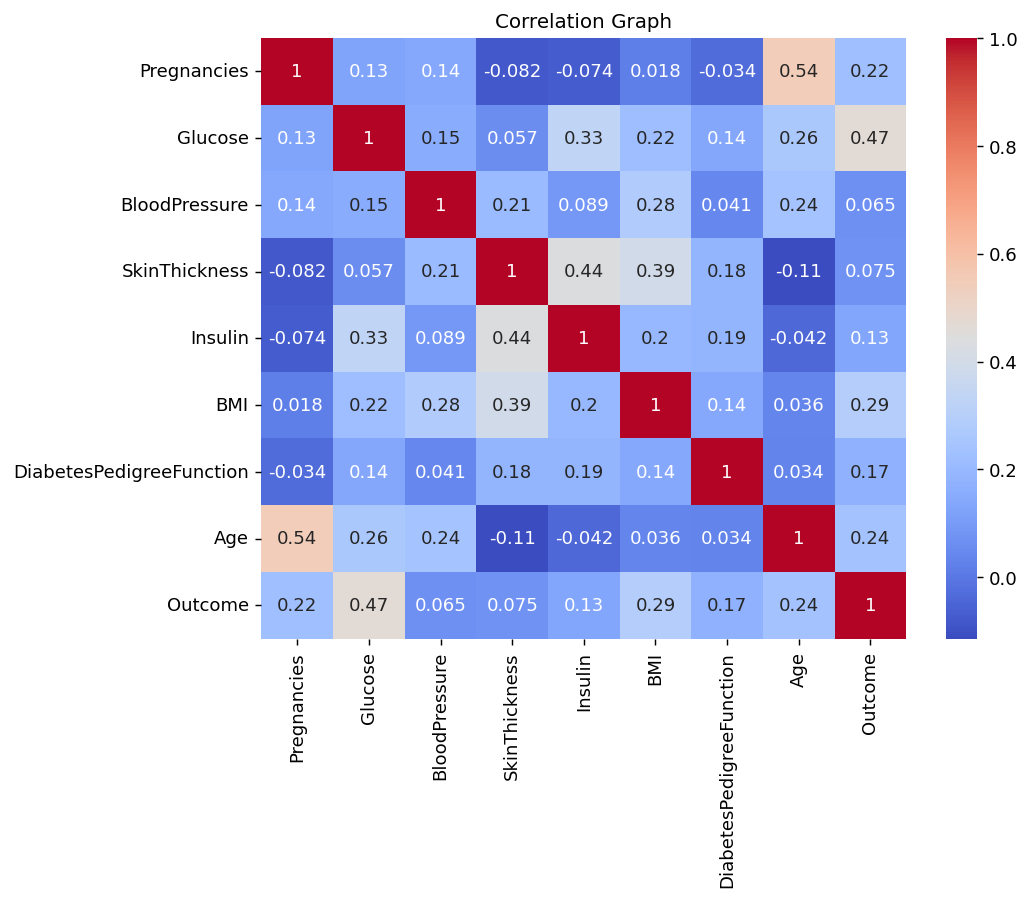

In [8]:
plt.figure (figsize = [8,6],  dpi = 130 )
plt.title ("Correlation Graph" , fontsize = 11 )
sns.heatmap (df.corr(), annot = True , cmap="coolwarm" )
plt.savefig(r"C:\Users\swapa\OneDrive\Documents\CodersCave_Data science intern\DIABETES PREDICTION\PLOTS AND IMAGES\correlation inmage.png")

# Visualization

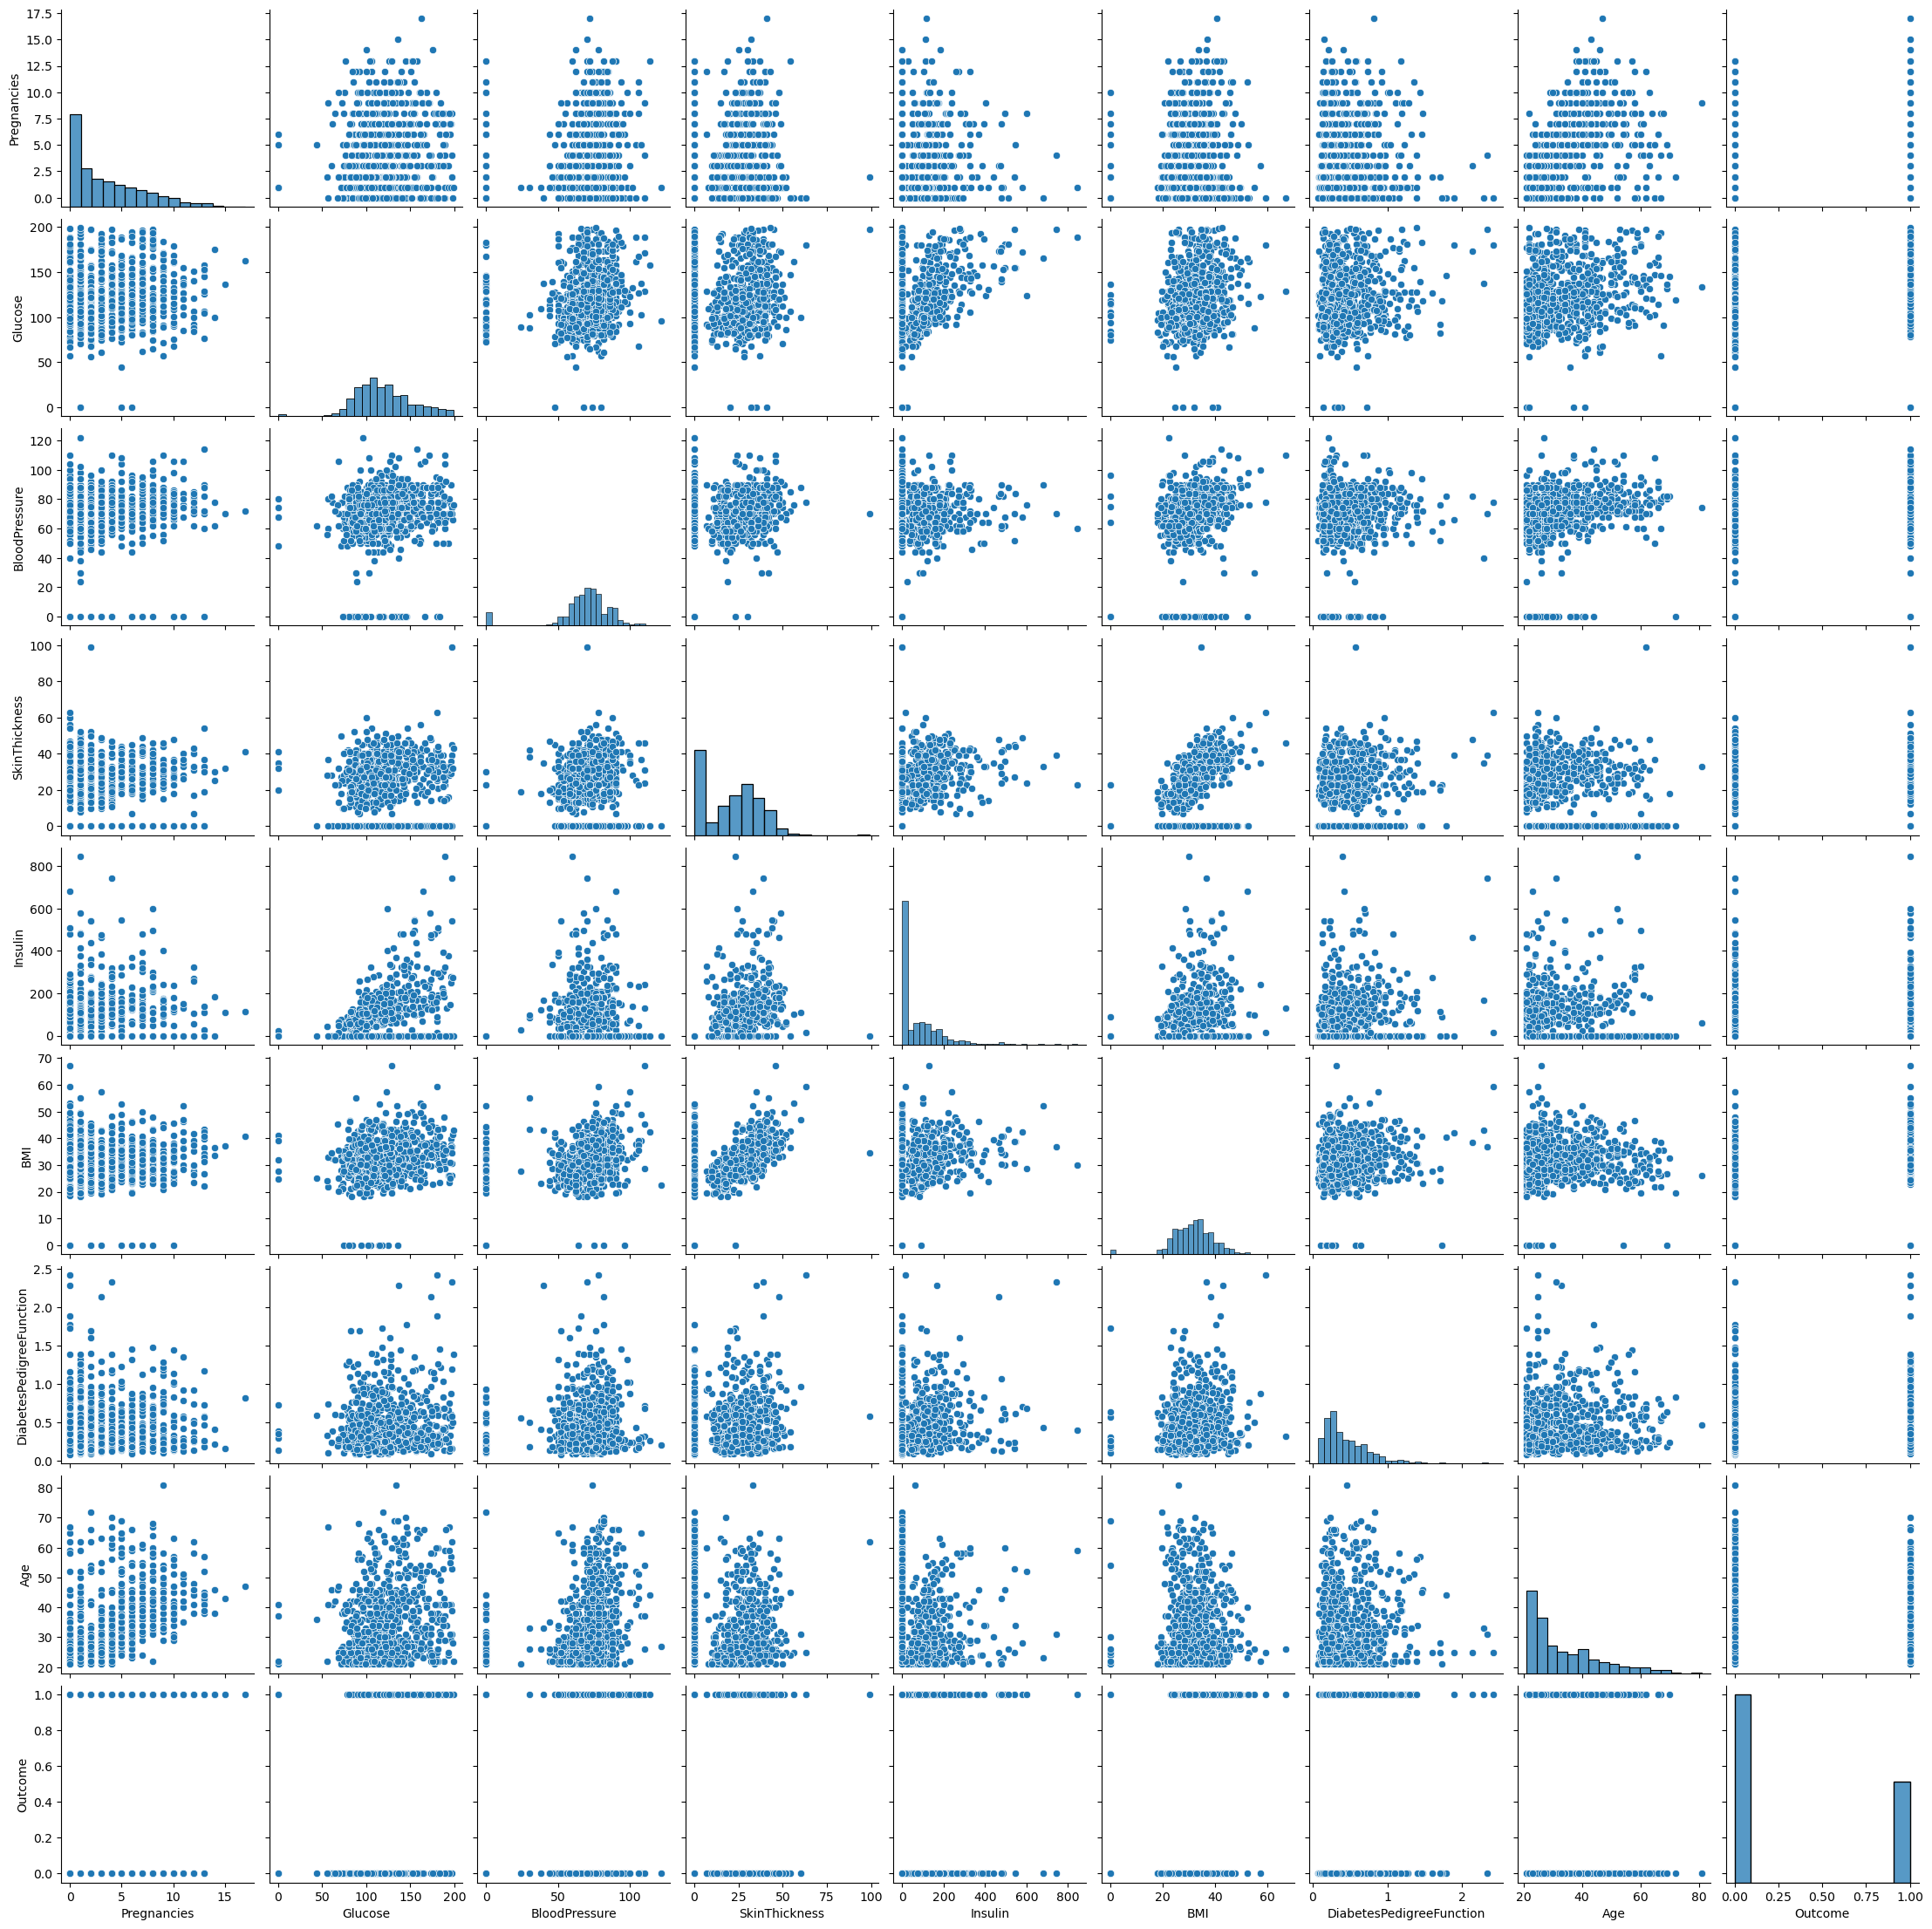

In [9]:
sns.pairplot(df)
plt.savefig(r"C:\Users\swapa\OneDrive\Documents\CodersCave_Data science intern\DIABETES PREDICTION\PLOTS AND IMAGES\pairplot.png")

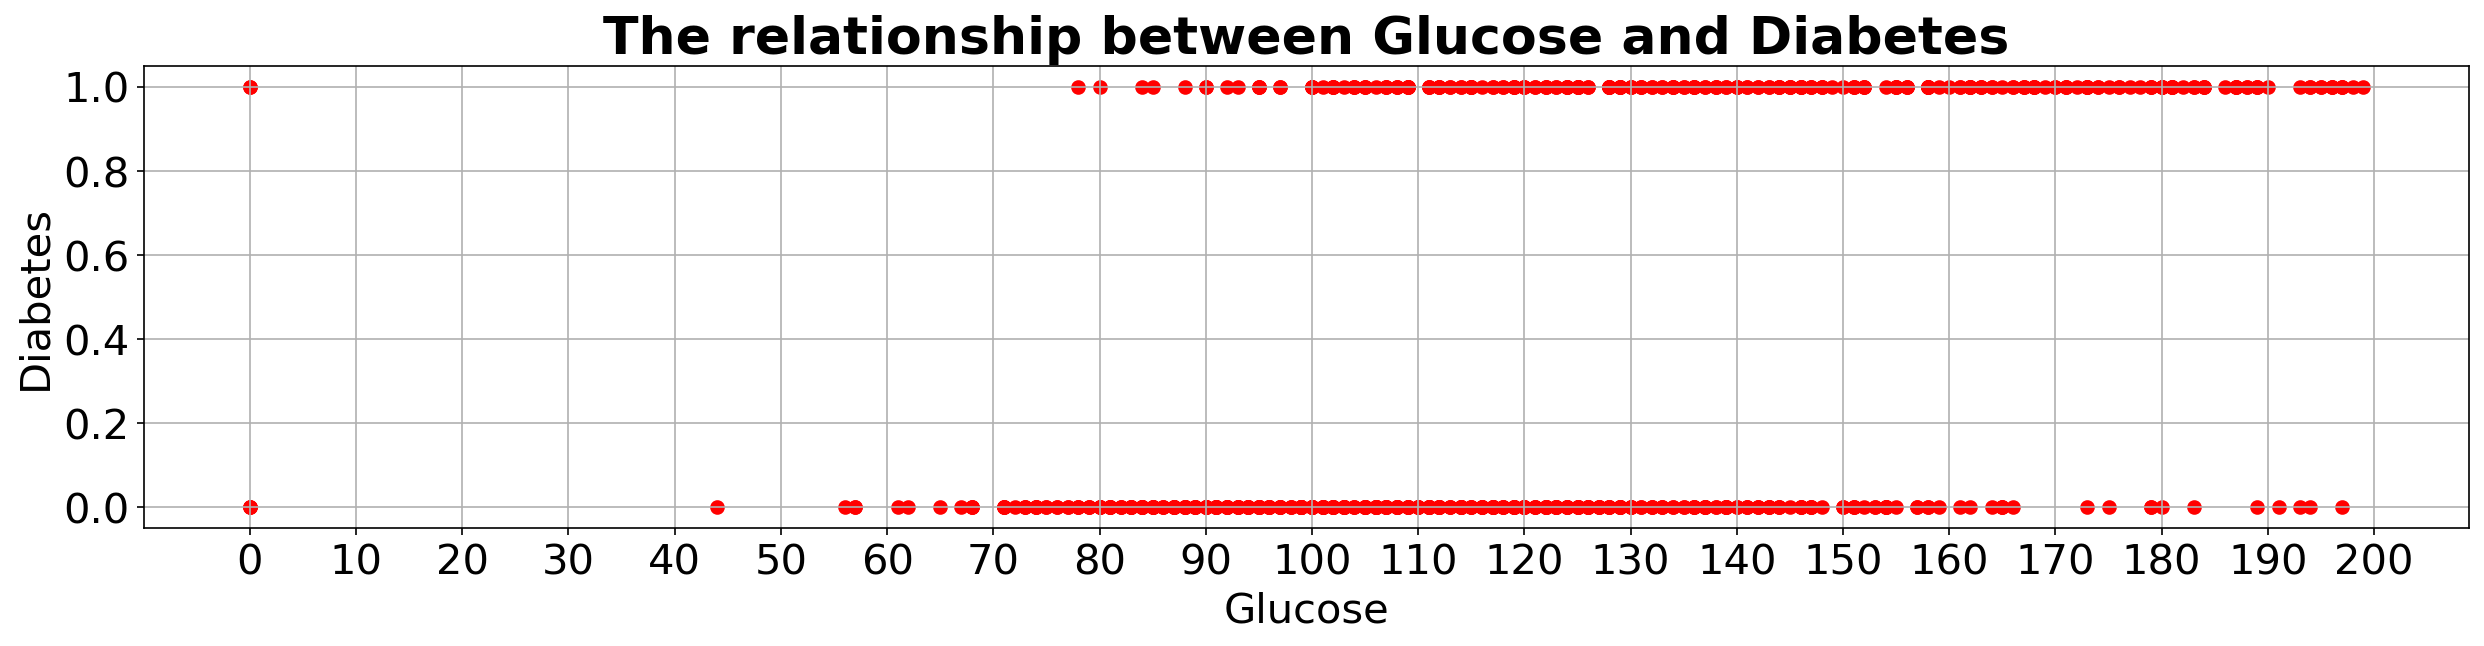

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["Glucose"] , df["Outcome"] , color = "red")
plt.title ("The relationship between Glucose and Diabetes" , weight='bold', fontsize = 25)
plt.xticks (range (0 , 205 , 10), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Glucose', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()
plt.savefig(r"C:\Users\swapa\OneDrive\Documents\CodersCave_Data science intern\DIABETES PREDICTION\PLOTS AND IMAGES\glucose_Diabetes.png")

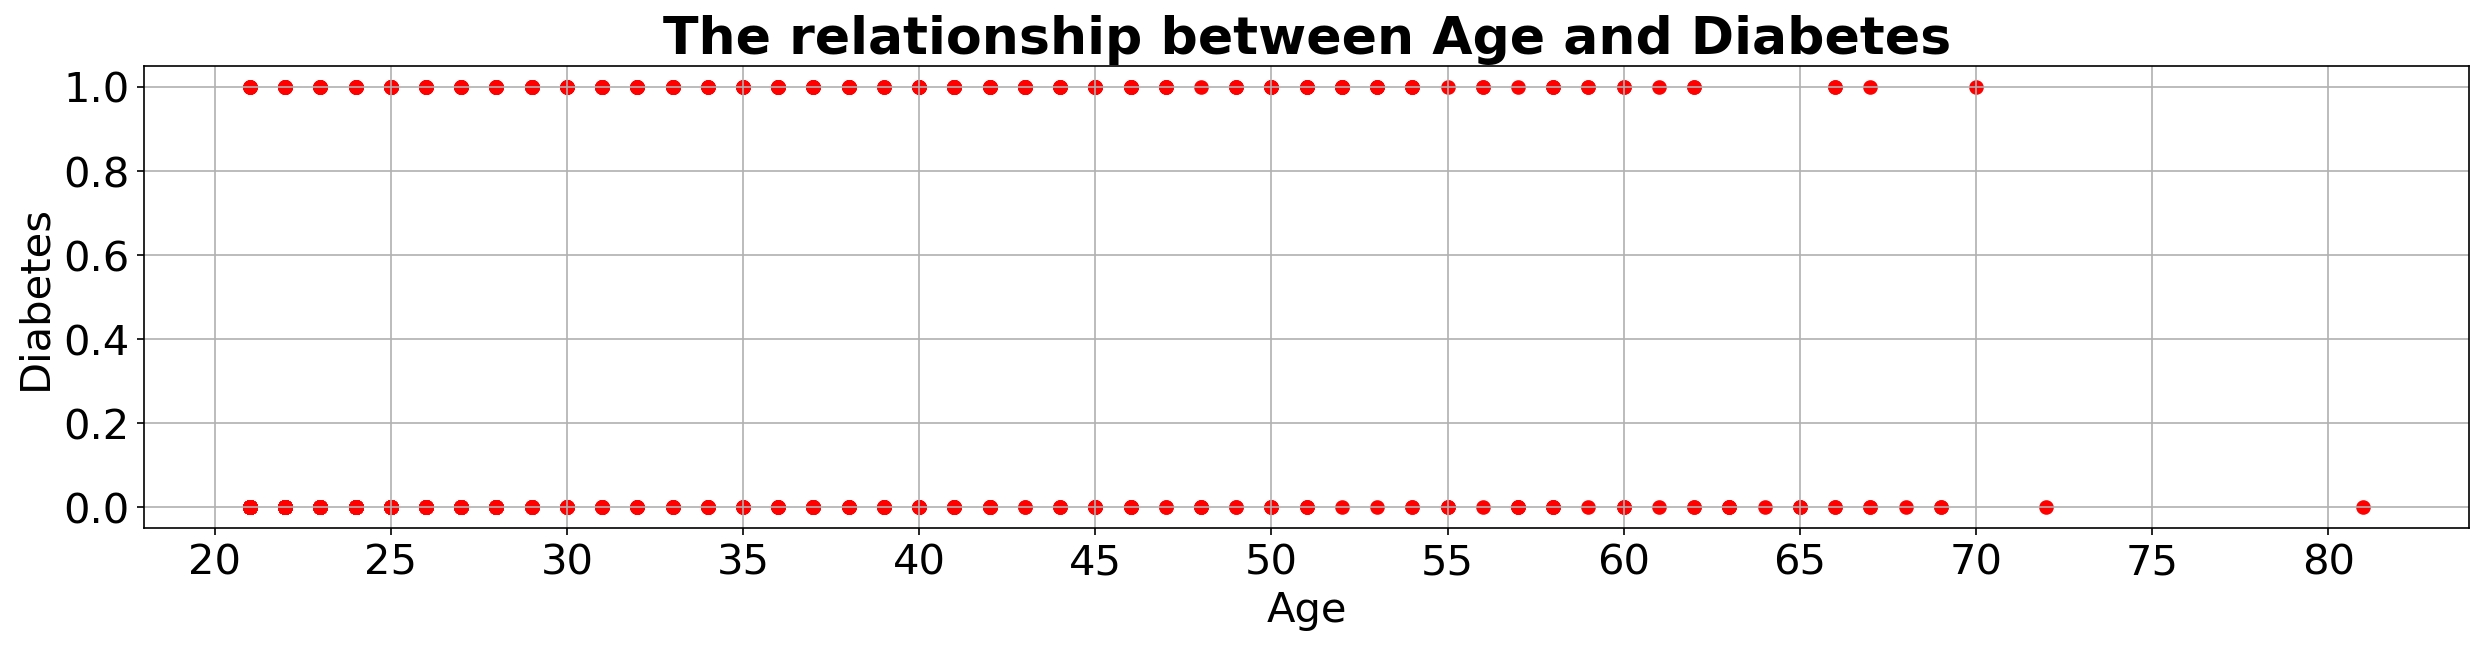

In [11]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["Age"] , df["Outcome"] , color = "red")
plt.title ("The relationship between Age and Diabetes" , weight='bold', fontsize = 25)
plt.xticks (range (20 , 85 , 5), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Age', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()


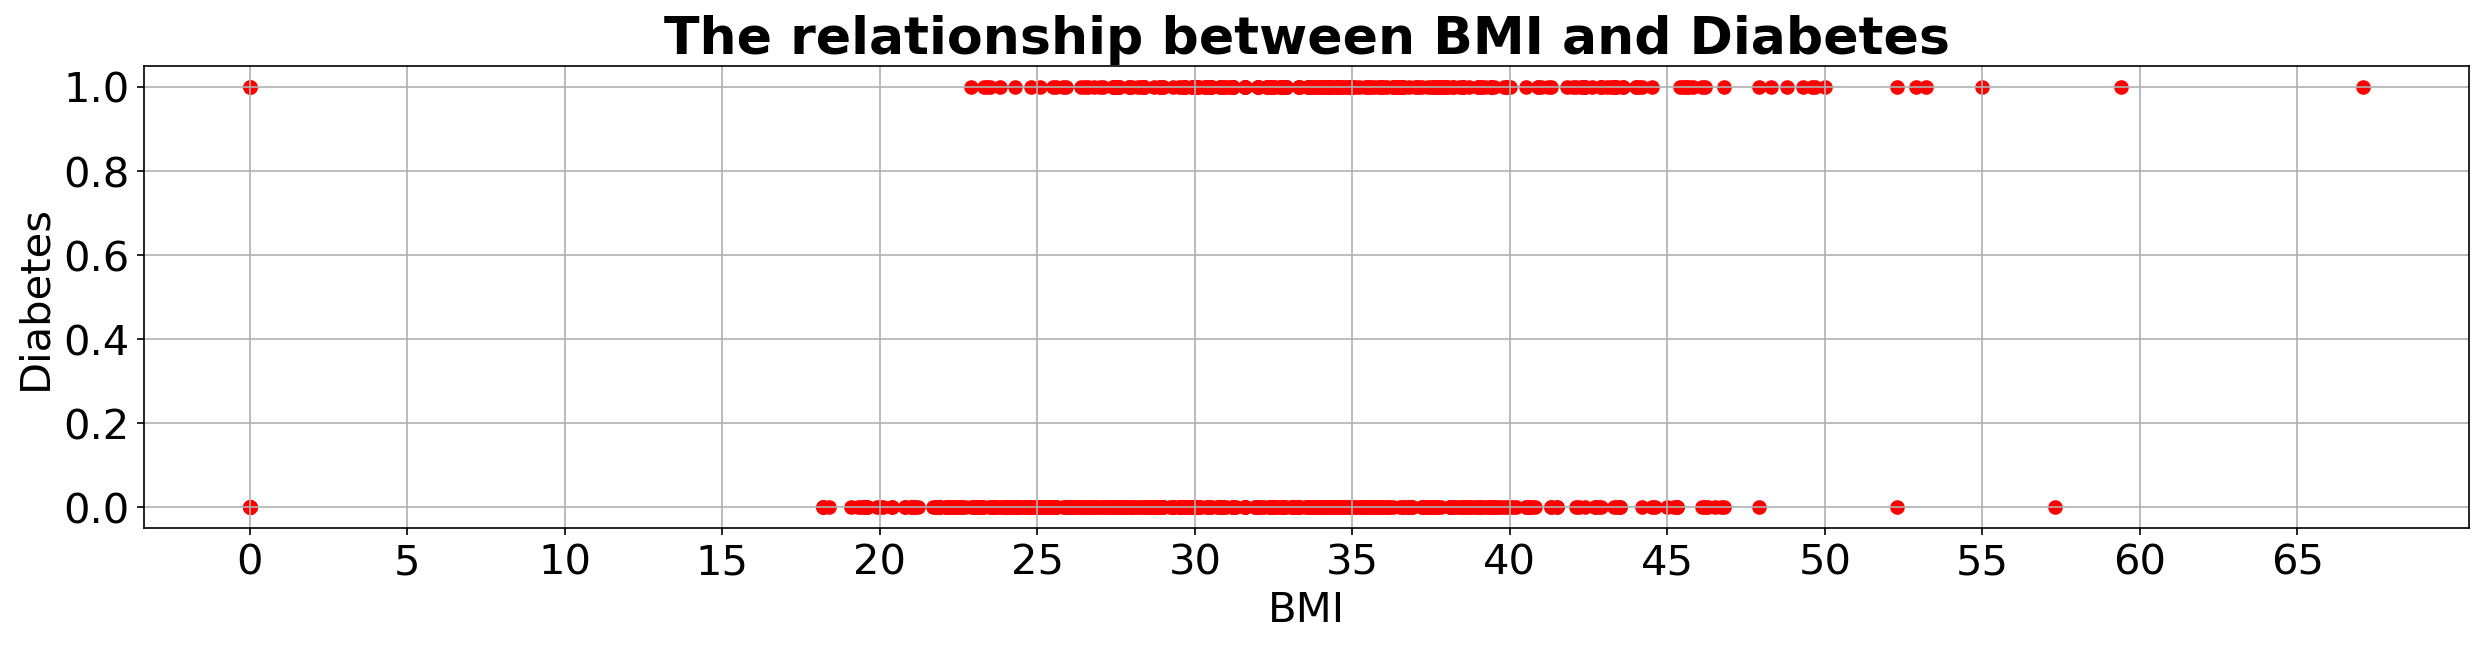

In [12]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BMI"] , df["Outcome"] , color = "red")
plt.title ("The relationship between BMI and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 70 , 5) , fontsize=20)
plt.yticks (fontsize = 20)
plt.xlabel ('BMI', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

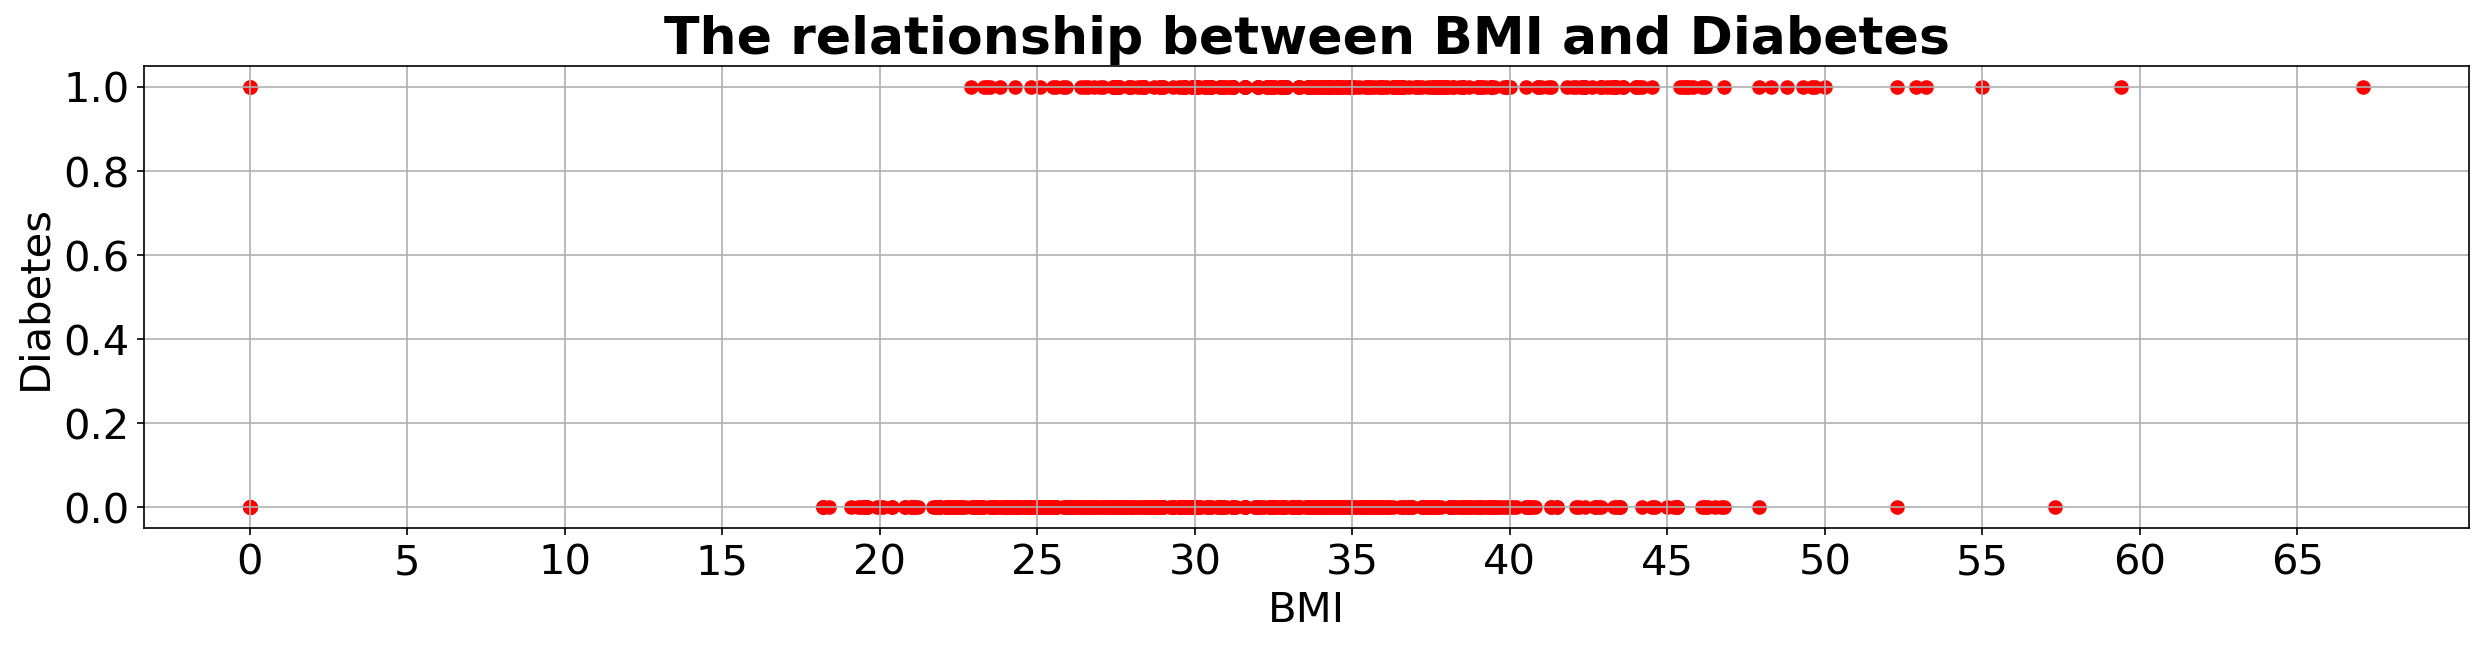

In [13]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BMI"] , df["Outcome"] , color = "red")
plt.title ("The relationship between BMI and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 70 , 5) , fontsize=20)
plt.yticks (fontsize = 20)
plt.xlabel ('BMI', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

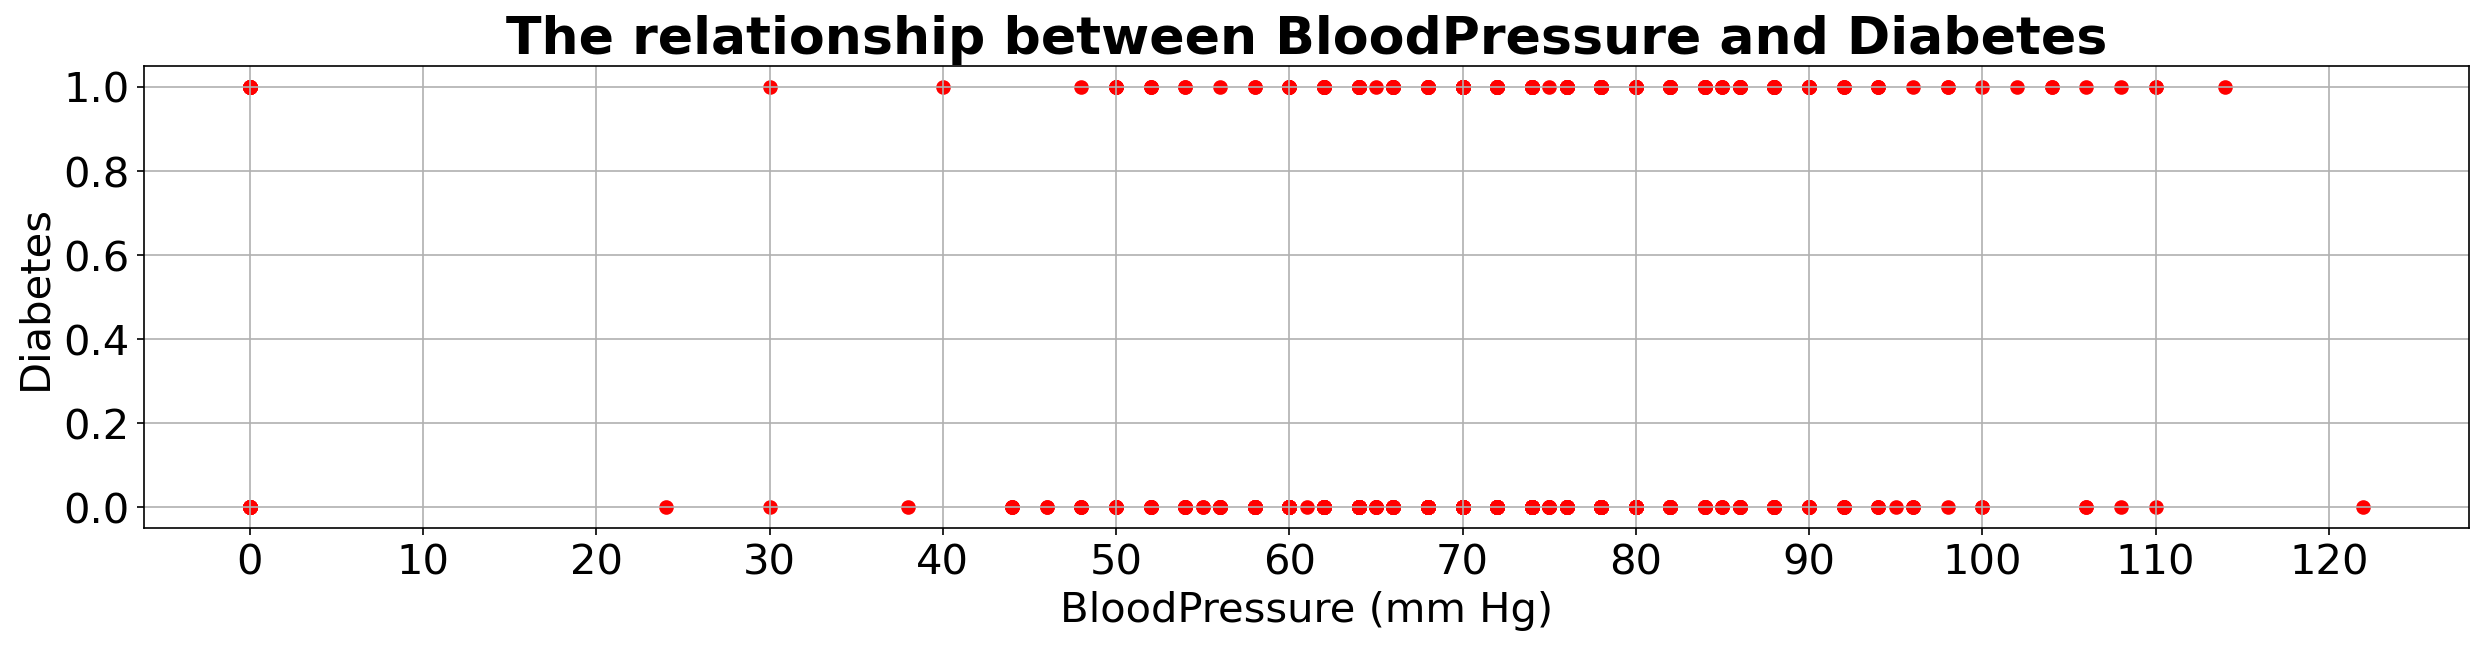

In [14]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BloodPressure"] , df["Outcome"] , color = "red")
plt.title ("The relationship between BloodPressure and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 125 , 10) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('BloodPressure (mm Hg)', fontsize = 20)
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()


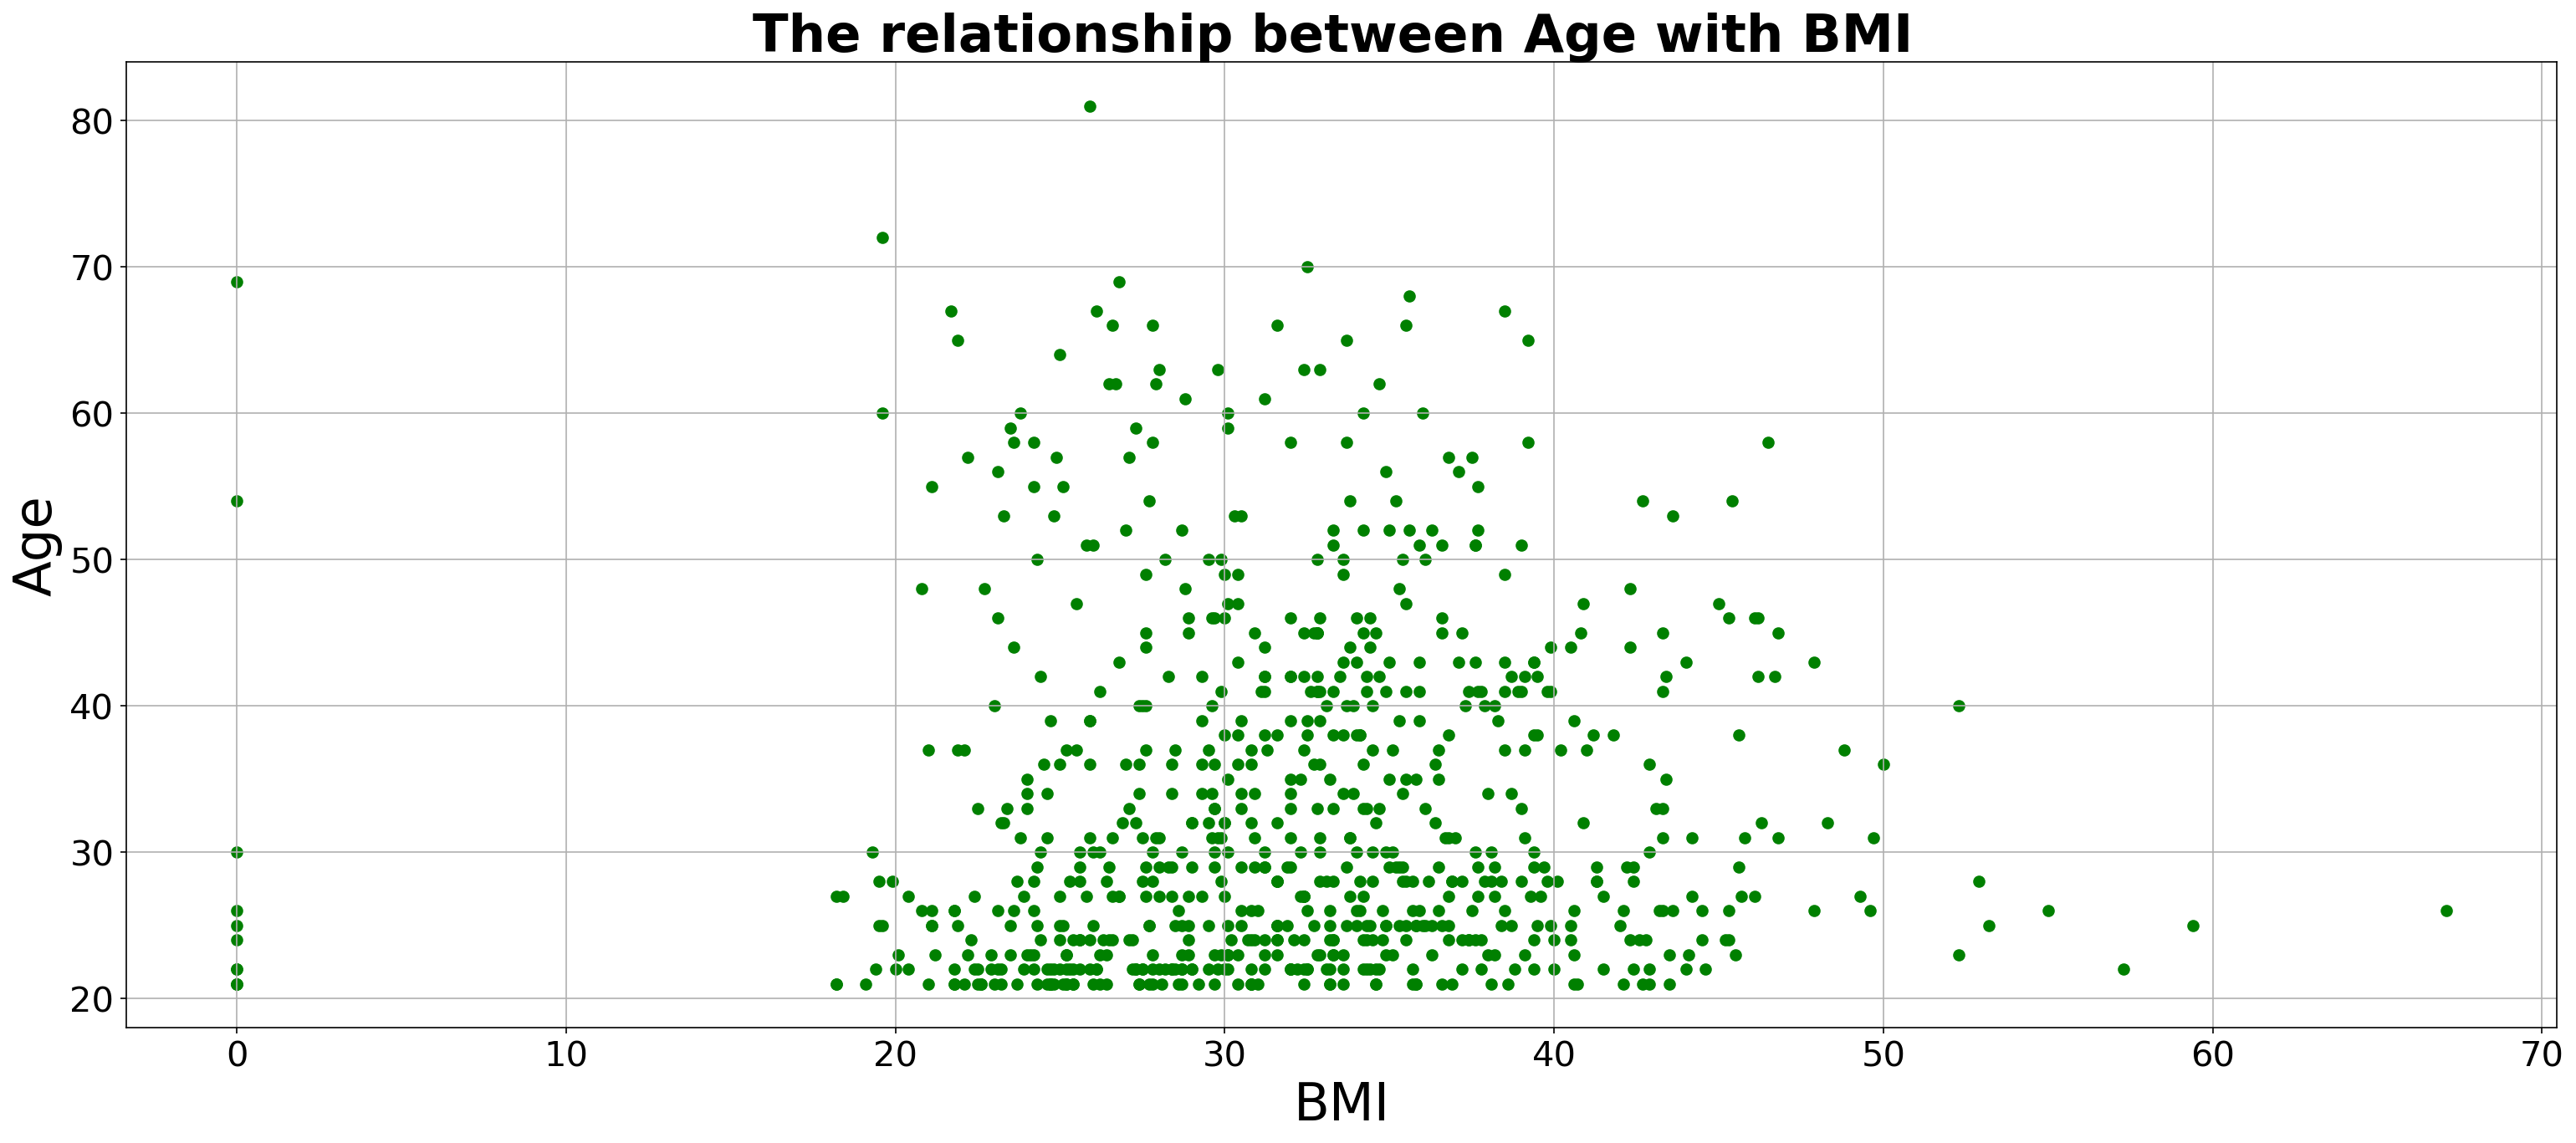

In [15]:
plt.figure(figsize = [25, 10] , dpi = 150) 
plt.scatter (df["BMI"] , df["Age"] , color = "green")
plt.title ("The relationship between Age with BMI " , weight = 'bold', fontsize = 30)
plt.xticks (range (0 , 80 , 10) , fontsize = 20)
plt.yticks (range (20 , 90 , 10) , fontsize = 20)
plt.xlabel ('BMI', fontsize = 30 )
plt.ylabel ('Age' , fontsize = 30)
plt.grid ()
plt.show ()

In [52]:
cols = df.columns
colors = ['Blue',"Green","Red","Black"]

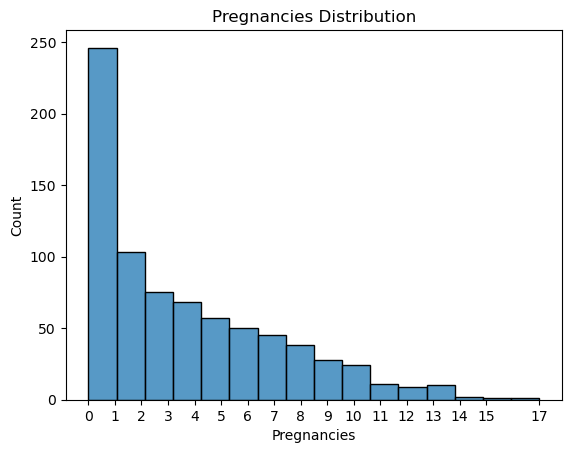

<Figure size 640x480 with 0 Axes>

In [69]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[0]} Distribution")
sns.histplot(data=df, x=df[cols[0]])
plt.xticks(ticks=[i for i in df[cols[0]].unique()])
plt.show()
plt.savefig(r"C:\Users\swapa\OneDrive\Documents\CodersCave_Data science intern\DIABETES PREDICTION\PLOTS AND IMAGES\Pregnancies_distribution_histogram.jpeg")
# sns.distplot(df[cols[0]])

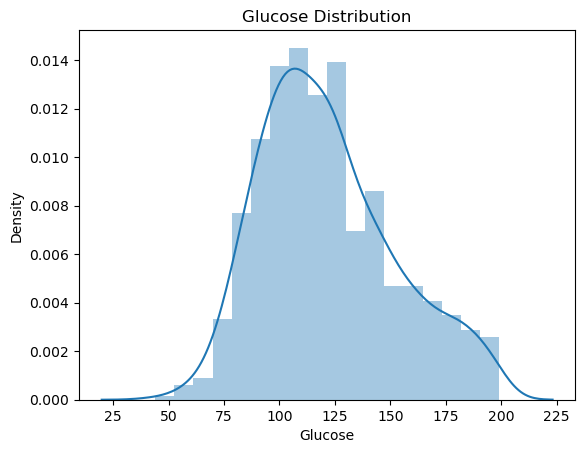

In [54]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[1]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[1]])
plt.show()

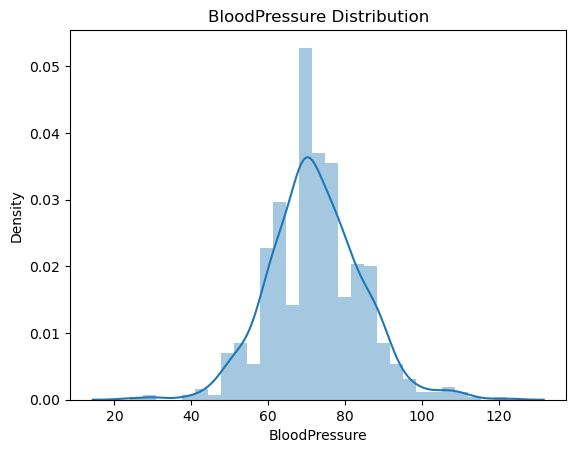

In [55]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[2]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[2]])
plt.show()

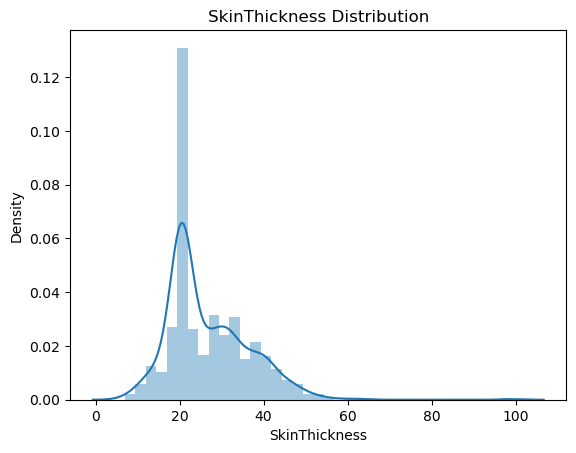

In [56]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[3]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[3]])
plt.show()

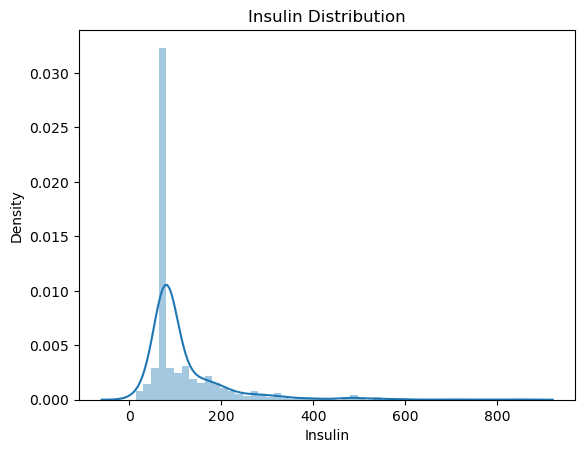

In [57]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[4]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[4]])
plt.show()

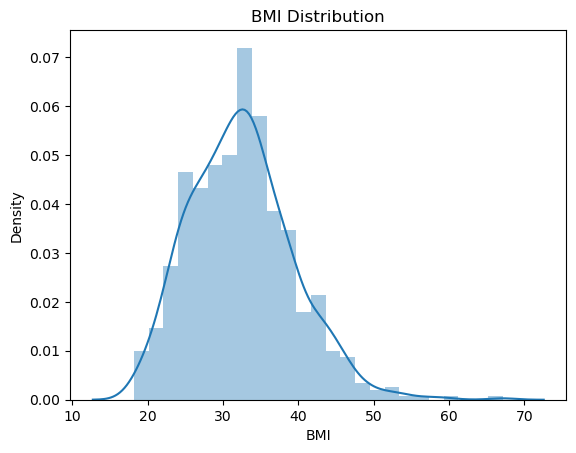

In [58]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[5]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[5]])
plt.show()

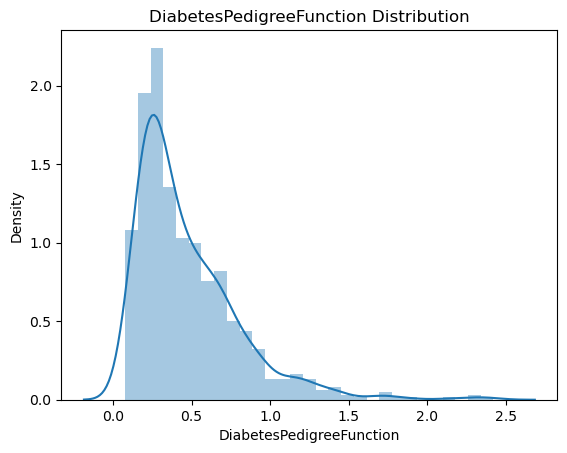

In [59]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[6]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[6]])
plt.show()

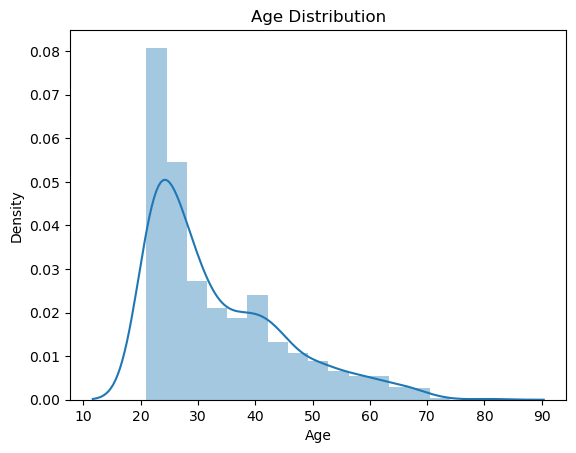

In [60]:
# df[cols[0]].plot.density(color='Blue')
plt.title(f"{cols[7]} Distribution")
# sns.histplot(data=df, x=df[cols[1]])
sns.distplot(df[cols[7]],)
plt.show()

# Observations

1.The dataset contains more younger people.
2.The BMI of Majority of people is between 30-40 which means that majority of the people are have obesity.
3.Majority of People having insuling less than 200
4.Majority of people having Skinthickness between 20-40
5.Majority of People having BP between 60-80

Having Diebetes:	268
Not Having Diebetes:	500
diabetes_percentage:	0.35 %
not diabetes_percentage:	0.65 %


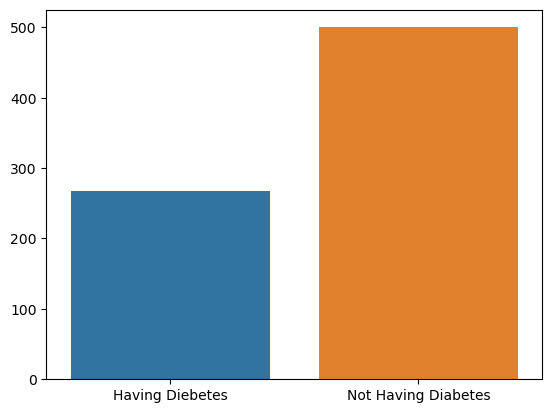

In [61]:
having_diabetes = df[df["Outcome"]==1]
not_having = df[~(df["Outcome"]==1)]



print("Having Diebetes:\t"+ str(len(having_diabetes)))
print("Not Having Diebetes:\t"+ str(len(not_having
                                       )))
sns.barplot(x=['Having Diebetes','Not Having Diabetes'], y= [len(having_diabetes),len(not_having)],
       
           )

print("diabetes_percentage:\t" + str(round(len(having_diabetes)/len(df),2)) + " %")
print("not diabetes_percentage:\t" + str(round(len(not_having)/len(df),2)) + " %")

1.In the dataset most of the peoples are not having diabetes. 

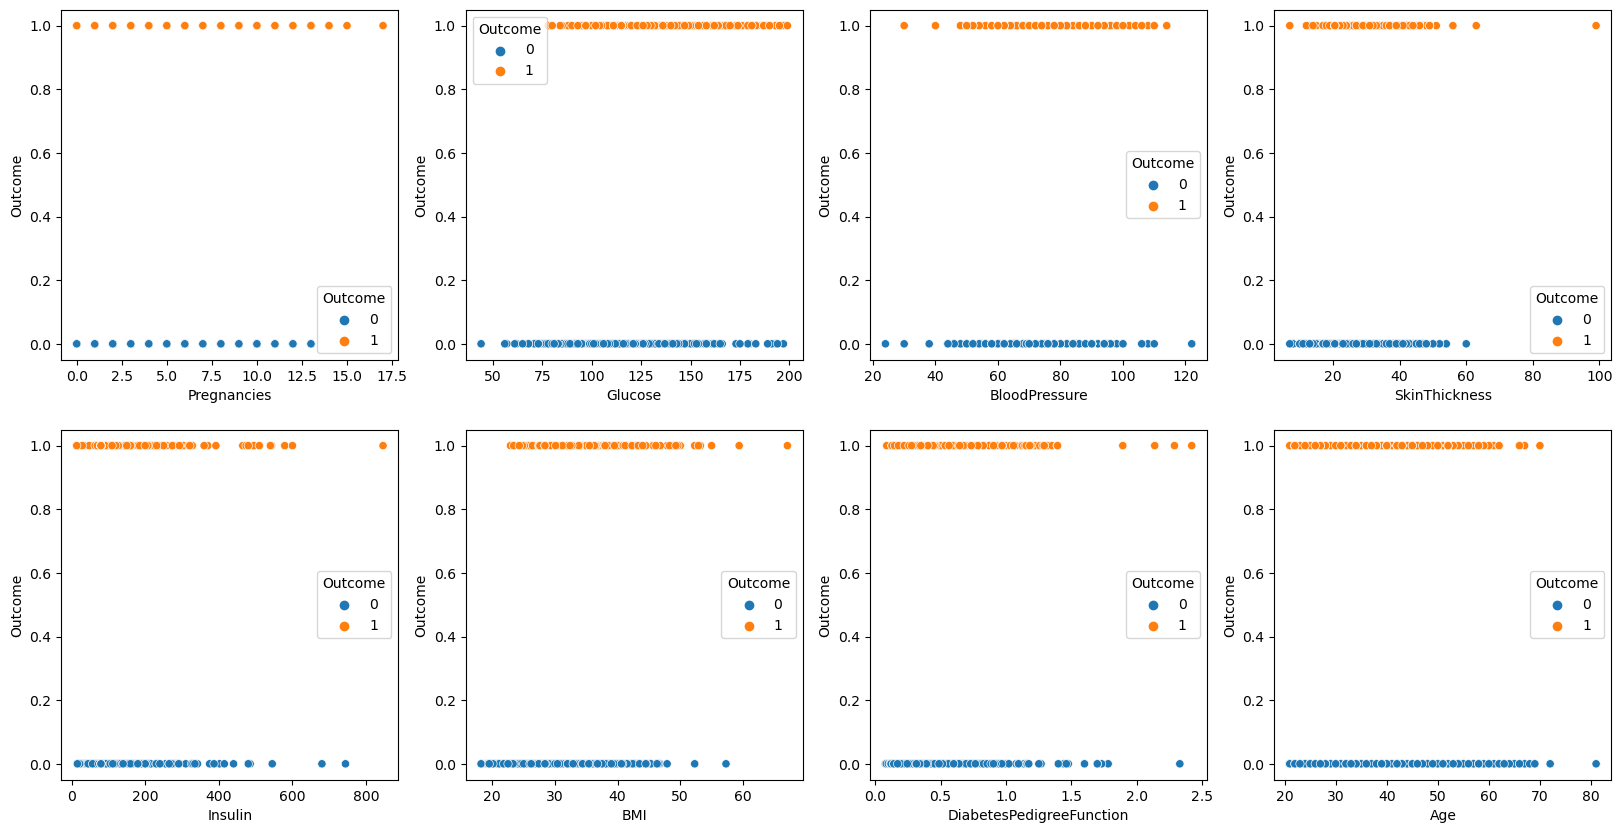

In [62]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
i = 0
j = 0
for col in cols[:-1]:
    sns.scatterplot(x=col,y='Outcome',data=df,hue='Outcome',ax=ax[i][j])    
    j += 1
    if j == 4:
        j = 0 # column
        i += 1 # next row

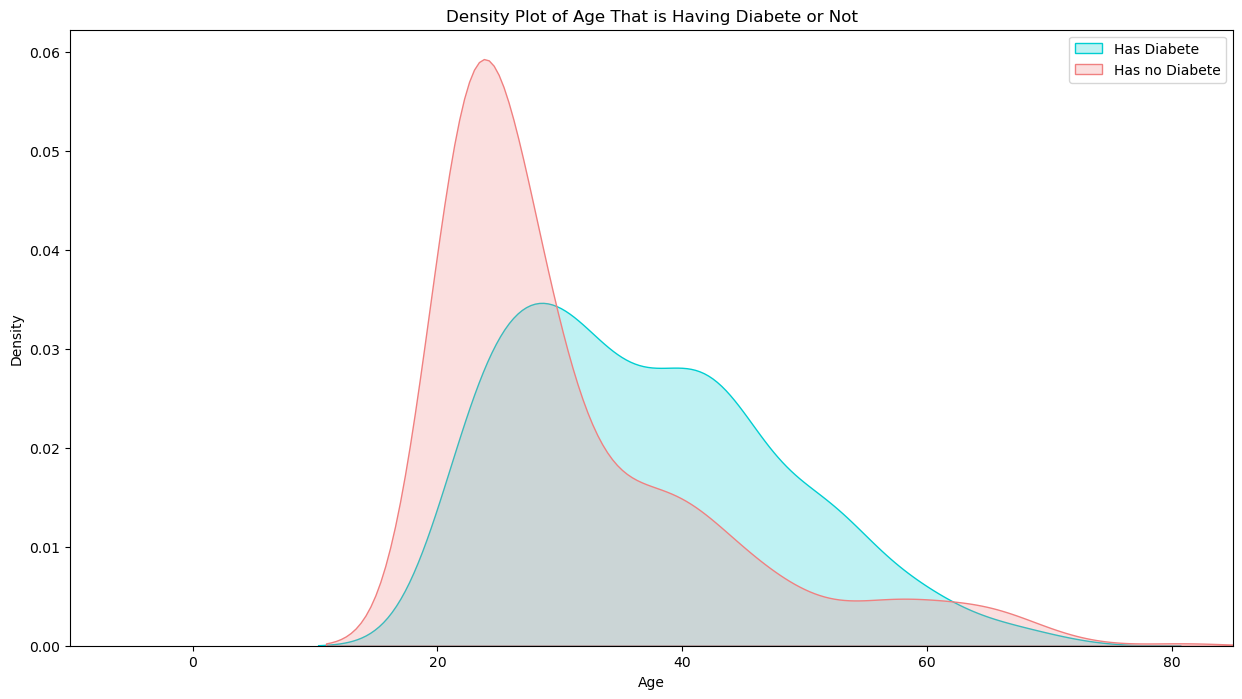

In [67]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Age"][df.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Age"][df.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Has Diabete', 'Has no Diabete'])
plt.title('Density Plot of Age That is Having Diabete or Not')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

1.This Plot shows that most of the diabetic patients between age 20-40

# check the null values

In [16]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [17]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# statistical Information

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


1.from the info function we can see that there is no null values but in the describe function we can see that there is maximum columns which has min value 0 which is not possible it there is some errors.

# Replace the 0 values with nan

In [19]:
df_copy=df.copy(deep=True)

In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [22]:
df_copy.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,True,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,True,True,False,False,False,False


In [23]:
df_copy.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Fill the nan values in the main dataset

In [24]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [25]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


1. now we can see that 0 values has been replaced and minimum is not 0 now.

# Store Feature Matrix In X and Target In Vector y

In [27]:
x = df.drop('Outcome',axis=1)
y= df['Outcome']
print("The shape of X",x.shape)
print("The shape of Y",y.shape)

The shape of X (768, 8)
The shape of Y (768,)


# Splitting The Dataset Into The Training Set And Test Set

In [28]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [29]:
X_train.shape

(614, 8)

In [30]:
y_train.shape

(614,)

In [31]:
X_test.shape

(154, 8)

In [32]:
y_test.shape

(154,)

# As outcome contains the value value 0 and 1 so it is a classification problem.So we will use different classification model

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
print("Libraries imported successfully for model building")

Libraries imported successfully for model building


In [34]:
pipeline_lr  = Pipeline([('scalar1',StandardScaler()),
                         ('lr_classifier',LogisticRegression())])

pipeline_knn = Pipeline([('scalar2',StandardScaler()),
                          ('knn_classifier',KNeighborsClassifier())])

pipeline_svc = Pipeline([('scalar3',StandardScaler()),
                         ('svc_classifier',SVC())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(max_depth=3))])
pipeline_gbc = Pipeline([('gbc_classifier',GradientBoostingClassifier())])

In [35]:
pipelines = [pipeline_lr,
            pipeline_knn,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc]

# Train the models of pipeline

In [36]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

# for checking accuracy score

In [37]:
pipe_dict = {0:'LR',
             1:'KNN',
             2:'SVC',
             3:'DT',
             4: 'RF',
             5: 'GBC'}

In [38]:
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}

In [39]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)*100))

LR Test Accuracy:76.62337662337663
KNN Test Accuracy:76.62337662337663
SVC Test Accuracy:73.37662337662337
DT Test Accuracy:72.72727272727273
RF Test Accuracy:77.27272727272727
GBC Test Accuracy:76.62337662337663


# we can see that our best model is random forest

# Now we will train random forest classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Outcome',axis=1)
y = df['Outcome']
rf =RandomForestClassifier(max_depth=3)


In [41]:
rf.fit(X,y)

RandomForestClassifier(max_depth=3)

# prediction of data

In [42]:
new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':148.0,
    'BloodPressure':72.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,    
},index=[0])

In [43]:
p = rf.predict(new_data)

In [44]:
if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

diabetic


# use of joblib model for saving the the best model so that we can use easily.

In [45]:
import joblib

In [46]:
joblib.dump(rf,'Diabetes_prediction_save_model')

['Diabetes_prediction_save_model']

In [47]:
model = joblib.load('Diabetes_prediction_save_model')

In [48]:
model.predict(new_data)

array([1], dtype=int64)

In [49]:
from tkinter import *
import joblib

In [50]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
   
    model = joblib.load('Diabetes_prediction_save_model')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    
    if result == 0:
        Label(master, text="Non-Diabetic").grid(row=31)
    else:
        Label(master, text="Diabetic").grid(row=31)
    
    
master = Tk()
master.title("Diabetes Prediction Using Machine Learning")


label = Label(master, text = "Diabetes Prediction"
                          , bg = "green", fg = "pink"). \
                               grid(row=0,columnspan=2)


Label(master, text="Pregnancies").grid(row=1)
Label(master, text="Glucose").grid(row=2)
Label(master, text="Enter Value of BloodPressure").grid(row=3)
Label(master, text="Enter Value of SkinThickness").grid(row=4)
Label(master, text="Enter Value of Insulin").grid(row=5)
Label(master, text="Enter Value of BMI").grid(row=6)
Label(master, text="Enter Value of DiabetesPedigreeFunction").grid(row=7)
Label(master, text="Enter Value of Age").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

# Thank You